In [58]:
import numpy as np
import cv2
from scipy import stats

import matplotlib.pyplot as plt
from skimage import data, color, filters
from skimage.transform import resize
from skimage.io import imread
from LieGroupsFlow import so2,to_lie_alg_manifold,forword_euler_mathod_lie_alg,lie_alg_manifold_to_orientations, angles_dist,angles_range

In [56]:
def gradient_to_angles(dx,dy):
    ''' Note: output of np.arctan2 is in [-pi,pi]'''
    return np.arctan2(dy, dx) # + np.pi / 2

def angles_to_gradient(angles):
    '''returd: the gradient in the perpendicular direction'''
    dx = np.cos(angles)# - np.pi/2)
    dy = np.sin(angles)#- np.pi/2)
    return dx,dy

def test_the_above():
    angles= np.arange(-np.pi,np.pi,np.pi/5)
    dx, dy =  angles_to_gradient(angles)
    angles2 =  gradient_to_angles(dx,dy)

#     return np.allclose(angles,angles2)
    return print(angles,angles2)

def add_noise(dx,dy):
    angles =  gradient_to_angles(dx,dy)
    
    mean = 0
    std_deviation=1
    shape = angles.shape
    low = -np.pi
    high = np.pi

    gaussian_noise = stats.truncnorm.rvs(low, high, mean,std_deviation, shape)
    ndx ,ndy = angles_to_gradient(angles+gaussian_noise)
    return ndx,ndy

def add_noise_a(angles,mean=0,std=1):    
    shape = angles.shape
    low = -np.pi
    high = np.pi

    gaussian_noise = gaussian_noise = np.random.normal(mean, std, shape)
    return angles_range(angles+gaussian_noise)
    

def compute_gradients(image):
    # Compute the gradient in the x direction
    grad_x = filters.sobel_h(image)
    # Compute the gradient in the y direction
    grad_y = filters.sobel_v(image)
    
    # Normalize the gradients for better visibility
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    grad_x_normalized = grad_x / (magnitude + 1e-8)  # Avoid division by zero
    grad_y_normalized = grad_y / (magnitude + 1e-8)
    
    return grad_x_normalized, grad_y_normalized

def plot_sparse_quiver(image, grad_x, grad_y, step=10):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray', interpolation='none',alpha=0.2)
    
    
    # Reduce the number of arrows by using slicing
    plt.quiver(np.arange(0, grad_x.shape[1], step),
               np.arange(0, grad_y.shape[0], step),
               grad_x[::step, ::step],
               grad_y[::step, ::step],
               color='tomato', scale=40, pivot='middle', alpha=0.6)
    
    plt.title('Sparse Edge Flow (Quiver Plot)')
    plt.axis('off')
    plt.show()
    
def plot_two_sparse_quiver(image, grad_x, grad_y, grad_x1=None, grad_y1=None,step=30):
    '''Here the input grad is alredy sparse'''
    
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray', interpolation='none',alpha=0.2)
    
    # Reduce the number of arrows by using slicing
    plt.quiver(np.arange(0, image.shape[1], step),
               np.arange(0, image.shape[0], step),
               grad_x,
               grad_y,
               color='tomato', scale=40, pivot='middle', alpha=1)
    
    # Reduce the number of arrows by using slicing
    if grad_x1 is not None:
        plt.quiver(np.arange(0, image.shape[1], step),
                   np.arange(0, image.shape[0], step),
                   grad_x1,
                   grad_y1,
                   color='b', scale=40, pivot='middle', alpha=1)
    
#     plt.title('Sparse Edge Flow (Quiver Plot)')
    plt.axis('off')
    plt.show()

In [33]:
# test_the_above()

In [8]:
def load_fingerprint():
    # Load an image 
    image = cv2.imread('fing1.jpg')  # Replace with any path
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return img

# Main execution
img = load_fingerprint()
grad_x, grad_y = compute_gradients(img)

In [22]:
step = 25
dx, dy= grad_x[::step,::step], grad_y[::step,::step]
sparse_angles = gradient_to_angles(dx, dy)

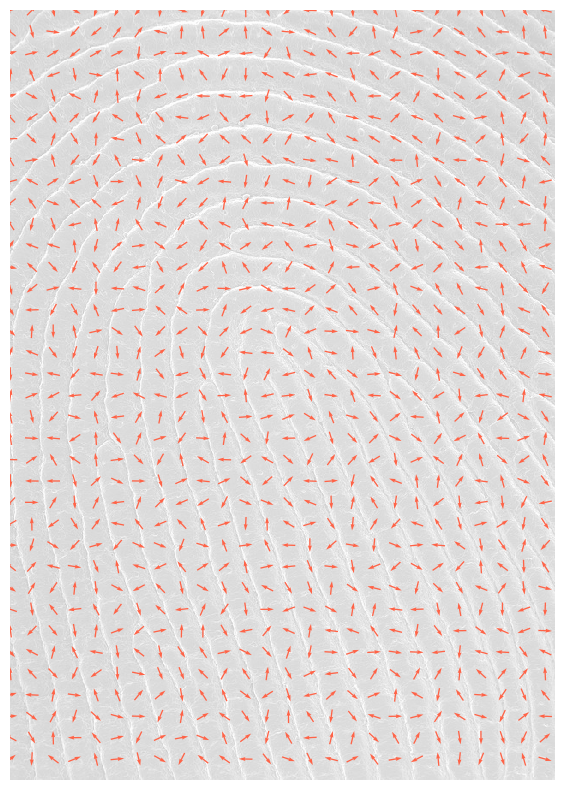

In [23]:
dx,dy = angles_to_gradient(sparse_angles)
plot_two_sparse_quiver(img,dx,dy,step=step)

## Here I try to make the first gradients map more accurate by manually angles determination

In [41]:
step = 30
dx, dy= grad_x[::step,::step], grad_y[::step,::step]
sparse_angles = gradient_to_angles(dx, dy)

In [42]:
sparse_angles[0,:]=np.pi/180 *np.array([40,20,39,45,10,19,17,16,10,5,3,1,-12,-25,-27,-21,-31,-40,-42,-43,-40,-50])
sparse_angles[1,:]=np.pi/180 *np.array([40,20,39,45,10,19,13,11,-3,-15,-1.215,-11,-22,-25,-27,-31,-36,-40,-42,-43,-40,-50])
sparse_angles[2,:]=np.pi/180 *np.array([40,20,43,45,42,44,3.1,11,13,12,-1.215,-10,-22,-12,-27,-31,-31,-40,-46,-47,-50,-55])
sparse_angles[3,:]=np.pi/180 *np.array([40,30,15,22,23,21,15,17,13,-2,-3.215,-11,-25,-20,-19,-28,-41,-35,-36,-30,-60,-55])
sparse_angles[4,:]=np.pi/180 *np.array([45,35,45,35,30,29,20,29,1,-3,-5,-10,-20,-30,-35,-30,-30,-31,-39,-29,-28,-29])
sparse_angles[5,:]=np.pi/180 *np.array([45,35,45,35,30,29,20,29,10,-3,-5,-10,-20,-30,-35,-30,-30,-31,-39,-29,-28,-29])
sparse_angles[6,:]=np.pi/180 *np.array([45,35,45,35,30,29,20,29,10,-3,-5,-10,-20,-30,-35,-30,-30,-31,-39,-35,-38,-32])
sparse_angles[7,:]=np.pi/180 *np.array([45,35,45,35,34,36,30,29,15,-3,-5,-10,-20,-30,-35,-30,-30,-31,-39,-32,-39,-35])
sparse_angles[8,:]=np.pi/180 *np.array([45,35,45,39,37,46,40,39,15,-3,5,-10,-20,-30,-35,-30,-30,-31,-39,-32,-39,-35])
sparse_angles[9,:]=np.pi/180 *np.array([70,70,55,39,37,46,40,39,15,-3,5,-10,-20,-30,-35,-30,-30,-31,-39,-32,-39,-35])
sparse_angles[10,:]=np.pi/180 *np.array([75,70,65,63,60,46,43,39,15,-3,2,-10,-20,-30,-37,-35,-34,-31,-39,-32,-39,-35])
sparse_angles[11,:]=np.pi/180 *np.array([75,70,65,63,60,46,80,79,47,30,10,-3,-20,-30,-37,-35,-34,-36,-42,-39,-39,-35])
sparse_angles[12,:]=np.pi/180 *np.array([75,70,65,67,62,56,80,79,79,30,-45,-3,-45,-30,-37,-35,-34,-36,-42,-39,-39,-35])
sparse_angles[13,:]=np.pi/180 *np.array([85,84,83,80,88,88,85,84,83,80,81,-45,-45,-40,-37,-39,-45,-40,-40,-35,-45,-45])
sparse_angles[14,:]=np.pi/180 *np.array([88,89,89,85,83,89,90,92,105,95, 100, 110, -50, -45, -40, -35, -35, -35, -40, -45, -35, -35])
sparse_angles[15,:]=np.pi/180 *np.array([85,84,83,80,85,83,85,100,100,105,120,130,100,-40,-41,-30,-45,-45,-40,-50,-45,-45])
sparse_angles[16,:]=np.pi/180 *np.array([91,85,80,85,93,95,95,100,110,110, 120, 130, 100, -45, -45, -50, -47, -45, -40, -45, -40, -38])
sparse_angles[17,:]=np.pi/180 *np.array([105,84,83,85,20,93,85,100,100,105,120,130,-40,-40,-50,-45,-50,-45,-40,-60,-45,-45])
sparse_angles[18,:]=np.pi/180 *np.array([91,85,80,85,93,95,95,100,110,110, 120, 130, 100, -45, -45,-50,-50,-45,-50,-60,-45,-45])
sparse_angles[19,:]=np.pi/180 *np.array([105,89,88,95,103,96,88,102,107,105,120,127,110,95,-80,-50,-67,-45,-40,-60,-45,-45])
sparse_angles[20,:]=np.pi/180 *np.array([95,100,95,93,95,95,97,103,110,110, 117, 125, 102, 100, 120,118,110,-55,-50,-60,-48,-46])
sparse_angles[21,:]=np.pi/180 *np.array([100,100,110,95,103,96,88,102,107,110,120,95,110,95,-80,-80,-67,-47,-48,-60,-50,-45])
sparse_angles[22,:]=np.pi/180 *np.array([95,110,95,93,115,110,113,103,110,110, 117, 95, 102, 100, 120,-61,-57,-58,-50,-60,-50,-51])
sparse_angles[23,:]=np.pi/180 *np.array([100,100,110,98,103,100,88,102,107,110,114,95,112,110,-75,-76,-67,-70,-60,-60,-60,-45])
sparse_angles[24,:]=np.pi/180 *np.array([95,110,100,97,130,110,113,103,100,95, 117, 95, 102, 100, 120,-61,-57,-68,-65,-67,-66,-51])
sparse_angles[25,:]=np.pi/180 *np.array([95,110,100,101,103,110,113,103,100,95, 111, 99, 102, 100, 120,-61,-57,-68,-65,-67,-66,-61])
sparse_angles[26,:]=np.pi/180 *np.array([95,110,100,97,101,110,113,103,100,99, 117, 99, 102, 97, 115,-61,-62,-68,-65,-67,-70,-70])
sparse_angles[27,:]=np.pi/180 *np.array([95,103,100,97,101,110,113,109,112,99, 117, 99, 102, 100, 120,-73,-62,-68,-65,-78,-91,-70])
sparse_angles[28,:]=np.pi/180 *np.array([95,110,100,97,101,99,113,103,100,99, 117, 103, 109, 110, 120,-81,-72,-72,-75,-77,-78,-89])
sparse_angles[29,:]=np.pi/180 *np.array([95,108,100,97,101,110,113,103,103,99, 115, 112, 102, 102, 108,-88,-82,-68,-70,-87,-87,-90.1])

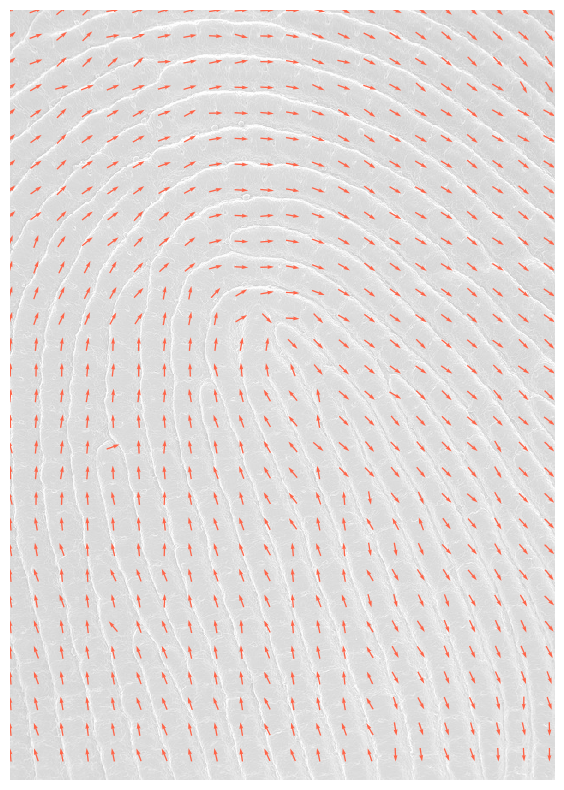

In [43]:
dx,dy = angles_to_gradient(sparse_angles)
plot_two_sparse_quiver(img,dx,dy,step=step)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 103.91it/s]


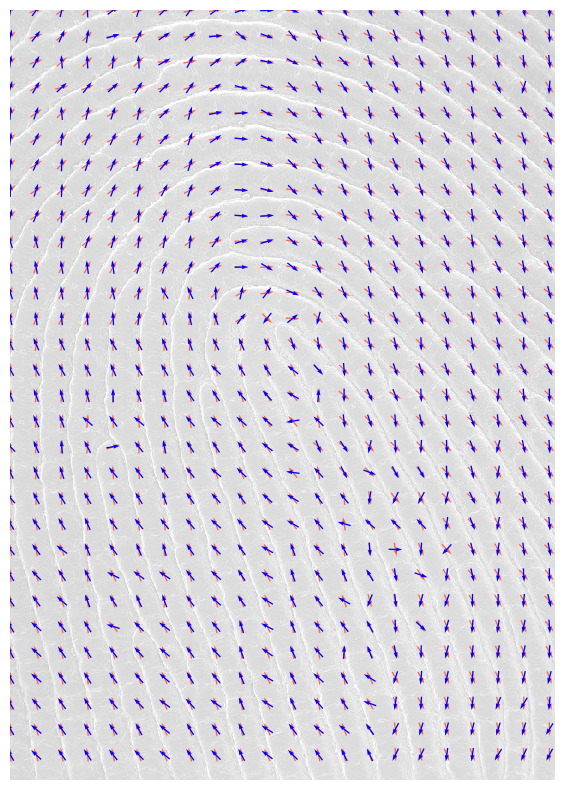

In [44]:
# Use the method Fisrst only on sparse flow-map:
step = 30
# dx, dy= grad_x[::step,::step], grad_y[::step,::step]
# sparse_angles = gradient_to_angles(dx, dy)
lie_group_manifold = so2(sparse_angles)

# Lie algebra so(2) manifold
lie_alg_manifold = to_lie_alg_manifold(lie_group_manifold)

new_lie_alg_manifold = forword_euler_mathod_lie_alg(lie_alg_manifold,100,dt=0.01)
new_thetas = lie_alg_manifold_to_orientations(new_lie_alg_manifold)

new_flow_x,new_flow_y=angles_to_gradient(new_thetas)
plot_two_sparse_quiver(img,dx, dy,new_flow_x,new_flow_y,step)

In [45]:
grad_x.shape

(900, 636)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 103.97it/s]


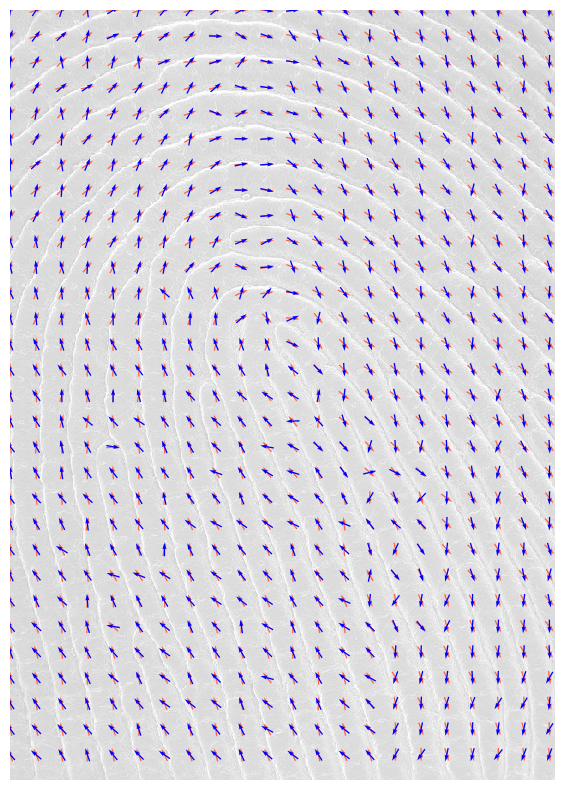

In [59]:
# Add noise
noisy_angles = add_noise_a(sparse_angles,mean=0,std=0.1)
noisy_dx,noisy_dy = angles_to_gradient(noisy_angles)


# plot_sparse_quiver(img_VG, noisy_grad_x_VG, noisy_grad_y_VG, step=30)

# Sparse Data
lie_group_manifold = so2(noisy_angles)

# Lie algebra so(2) manifold
lie_alg_manifold = to_lie_alg_manifold(lie_group_manifold)

new_lie_alg_manifold = forword_euler_mathod_lie_alg(lie_alg_manifold,50,dt=0.02)
new_thetas = lie_alg_manifold_to_orientations(new_lie_alg_manifold)

new_flow_x,new_flow_y = angles_to_gradient(new_thetas)
plot_two_sparse_quiver(img,noisy_dx, noisy_dy,new_flow_x,new_flow_y,step)